In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train_dataset_train.csv')
data

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,Пропуск FacePay,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,15005
1091017,1091018,141174B366F14A8703903813A49374DB,Пропуск FacePay,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,Пропуск FacePay,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,Пропуск FacePay,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014


In [4]:
data.isnull().any()

id                False
ticket_id         False
ticket_type_nm    False
entrance_id       False
entrance_nm       False
station_id        False
station_nm        False
line_id           False
line_nm           False
pass_dttm         False
time_to_under     False
label             False
dtype: bool

In [5]:
data.describe() # вроде в этой задаче не надо

,id,entrance_id,station_id,line_id,time_to_under,label
count,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06
mean,5.455110e+05,8.581884e+02,8.601452e+03,8.590013e+00,5.104668e+02,7.723527e+03
std,3.149508e+05,9.003577e+02,1.247133e+04,1.247157e+01,2.328452e+02,1.167015e+04
min,1.000000e+00,2.000000e+01,1.002000e+03,1.000000e+00,3.001667e+01,1.002000e+03
25%,2.727560e+05,2.150000e+02,3.018000e+03,3.000000e+00,3.229500e+02,3.006000e+03
50%,5.455110e+05,3.370000e+02,7.009000e+03,7.000000e+00,5.686833e+02,6.013000e+03
75%,8.182660e+05,2.087000e+03,9.022000e+03,9.000000e+00,6.838833e+02,9.012000e+03
max,1.091021e+06,2.466000e+03,8.101600e+04,8.100000e+01,1.437417e+03,8.101600e+04


In [6]:
for col in data.columns:
    print(f'{col} {data[col].unique()}')

id [      1       2       3 ... 1091019 1091020 1091021]
ticket_id ['40BD89EC85646EFB69E283F39C298E60' '126727A96489CC976A8C08E5CEB00542'
 'D28CE6A9E0E5B6D213470A97CFF32485' ... '6A738232F8E43DFCD4027FDC0EA6CC03'
 'E38493B30A7C55170806F187AF5EEA15' '3DF2B6366631ECA06274DD2CB5B0DF24']
ticket_type_nm ['Пропуск FacePay' 'СК учащегося 30 дней' 'БСК дружинника г.Москвы'
 '30 дней' 'КОШЕЛЕК' 'СК студента 30 дней' '90 дней' '90 дней ЕДИНЫЙ ТК'
 '30 дней СК учащегося' '90 дней СК студента' '30 дней СК студента' 'ББК'
 'СК аспиранта 90 дней' 'Социальная карта москвича' '30 дней ЕДИНЫЙ ТК'
 'Социальная карта жителя Моск. области' '30 дней Пригород ТК'
 'Социальная карта москвича с сопровождающим'
 'Пропуск сотрудника УВД по охране Метрополитена' '60 поездок ЕДИНЫЙ ТК'
 'СК для сотрудника ГУВД г.Москвы' '365 дней ЕДИНЫЙ ТК'
 'ВЕСБ МОСКВА (7мин)' 'СК студента 90 дней' '90 дней Пригород ТК'
 '30 дней  Пригород' '365 дней Пригород ТК' '365 дней'
 'СК ординатора 30 дней' '30 дней СК аспиранта' '30 дн

<AxesSubplot:>

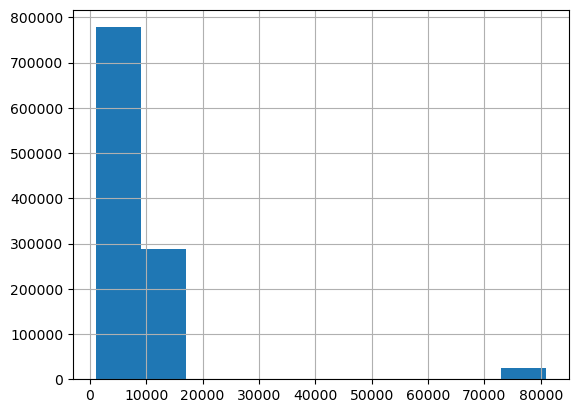

In [7]:
data['label'].hist()

<AxesSubplot:>

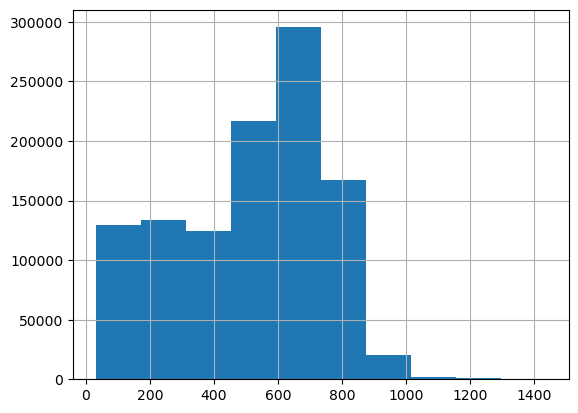

In [8]:
data['time_to_under'].hist()

In [9]:
data['pass_dttm'] = pd.to_datetime(data['pass_dttm'])
data['pass_day'] = data['pass_dttm'].dt.day
data['pass_hour'] = data['pass_dttm'].dt.hour
data

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,pass_day,pass_hour
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,Пропуск FacePay,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,15005,19,2
1091017,1091018,141174B366F14A8703903813A49374DB,Пропуск FacePay,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007,19,3
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,Пропуск FacePay,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010,19,3
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,Пропуск FacePay,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014,19,3


In [10]:
data.replace({'Пропуск FacePay':1,'КОШЕЛЕК':1,'ББК':1,'ВЕСБ МОСКВА (7мин)':1,'ВЕСБ МО (7 мин)':1,'ВЕСБ МО (тип 5)':1,'Временный билет ММ':1,'3 суток Единый ТК':1,'ВЕСБ МОСКВА':1,'1 сутки ЕДИНЫЙ ТК':1,'1 сутки Пригород ТК':1,'ВЕСБ МО с сопровождающим':1,'Билет 3 суток ЕДИНЫЙ':1,'ВЕСБ МО (тип 6)':1,'Билет 1 сутки ЕДИНЫЙ':1}, inplace=True)
data.replace({'СК учащегося 30 дней' :2,'СК студента 30 дней':2,'30 дней СК учащегося':2,'90 дней СК студента':2,'30 дней СК студента':2,'СК аспиранта 90 дней':2,'СК студента 90 дней':2,'СК ординатора 30 дней':2,'30 дней СК аспиранта' :2,'30 дней СК ординатора':2,'90 дней СК ординатора' :2,'СК ординатора 90 дней':2,'СК аспиранта 30 дней':2,'90 дней СК учащегося':2,'СК учащегося 90 дней':2,'90 дней СК аспиранта':2,'СК ассистента-стажера 30 дней':2,'СК ассистента-стажера 90 дней':2,'30 дней СК ассистента-стажера':2}, inplace=True)
data.replace({'БСК дружинника г.Москвы' :3,'30 дней':3,'90 дней':3,'90 дней ЕДИНЫЙ ТК':3,'Социальная карта москвича':3,'30 дней ЕДИНЫЙ ТК':3,'Социальная карта жителя Моск. области':3,'30 дней Пригород ТК':3,'Социальная карта москвича с сопровождающим':3,'60 поездок ЕДИНЫЙ ТК':3,'365 дней ЕДИНЫЙ ТК':3,'90 дней Пригород ТК':3,'30 дней  Пригород':3,'365 дней Пригород ТК':3,'365 дней':3,'Социальная карта жителя Моск. области с сопровождающим':3,'Безналичная транспортная карта':3,'90 дней  Пригород':3,'Ультралайт Единый (70)':3,'365 дней  Пригород':3,'ВЛБ МОСКВА':3}, inplace=True)
data.replace({'Пропуск сотрудника УВД по охране Метрополитена':4,'СК для сотрудника ГУВД г.Москвы':4,'Пропуск сотрудника  метрополитена':4,'Пропуск руководителя метрополитена':4,'Пропуск  сотрудника МЦК':4}, inplace=True)
pd.options.mode.chained_assignment = None
data


,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,pass_day,pass_hour
0,1,40BD89EC85646EFB69E283F39C298E60,1,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001,12,5
1,2,126727A96489CC976A8C08E5CEB00542,2,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011,12,5
2,3,D28CE6A9E0E5B6D213470A97CFF32485,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022,12,5
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022,12,5
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,1,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091016,1091017,6A738232F8E43DFCD4027FDC0EA6CC03,1,2283,Нижегородская (второй),15005,Нижегородская,15,Некрасовская,2022-09-19 02:54:50,124.750000,15005,19,2
1091017,1091018,141174B366F14A8703903813A49374DB,1,278,Калужская (Северный),6007,Калужская,6,Калужско-Рижская,2022-09-19 03:06:02,56.066667,6007,19,3
1091018,1091019,E38493B30A7C55170806F187AF5EEA15,1,118,Каширская (Северный ),2010,Каширская,2,Замоскворецкая,2022-09-19 03:17:00,91.283333,2010,19,3
1091019,1091020,3DF2B6366631ECA06274DD2CB5B0DF24,1,2452,Воронцовская (Первый),11014,Воронцовская,11,Большая кольцевая,2022-09-19 03:23:30,47.900000,11014,19,3


In [11]:
data.columns

Index(['id', 'ticket_id', 'ticket_type_nm', 'entrance_id', 'entrance_nm',
       'station_id', 'station_nm', 'line_id', 'line_nm', 'pass_dttm',
       'time_to_under', 'label', 'pass_day', 'pass_hour'],
      dtype='object')

In [12]:
data = data[['id',  'ticket_type_nm', 'entrance_id',
       'station_id',  'line_id',
       'time_to_under', 'label', 'pass_day', 'pass_hour']]
data

,id,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,pass_day,pass_hour
0,1,1,2402,11007,11,216.316667,8001,12,5
1,2,2,110,2006,2,648.183333,9011,12,5
2,3,3,110,2006,2,865.333333,7022,12,5
3,4,3,110,2006,2,1048.233333,2022,12,5
4,5,1,110,2006,2,965.600000,2017,12,5
...,...,...,...,...,...,...,...,...,...
1091016,1091017,1,2283,15005,15,124.750000,15005,19,2
1091017,1091018,1,278,6007,6,56.066667,6007,19,3
1091018,1091019,1,118,2010,2,91.283333,2010,19,3
1091019,1091020,1,2452,11014,11,47.900000,11014,19,3


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['id', 'ticket_type_nm', 'entrance_id',
       'station_id',  'line_id', 
        'pass_day', 'pass_hour']], data['time_to_under'], test_size=0.33)

In [14]:
X_train

,id,ticket_type_nm,entrance_id,station_id,line_id,pass_day,pass_hour
1013879,1013880,3,26,1011,1,18,9
268764,268765,1,284,6009,6,13,8
486761,486762,1,151,3014,3,14,13
668821,668822,1,2264,15002,15,15,18
969083,969084,1,84,2011,2,17,19
...,...,...,...,...,...,...,...
11469,11470,3,303,7009,7,12,6
999226,999227,1,92,2014,2,18,8
296770,296771,3,339,7021,7,13,10
959181,959182,3,408,10009,10,17,17


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(X_train, y_train)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
y_pred

array([624.13223738, 528.21763485, 523.67475202, ..., 111.97814796,
       406.67561845, 609.25190969])

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.46461371772001736


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data[['id', 'ticket_type_nm', 'entrance_id',
       'station_id',  'line_id', 
        'pass_day', 'pass_hour']], data['label'], test_size=0.33)


In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='micro')
recall

0.0412013209753442

In [27]:
f = 0.5 * r2 + 0.5 * recall
f

0.2529075193476808